# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Data Understanding**

In [ ]:
file_path = "https://raw.githubusercontent.com/Travu-Team/travu-machine-learning/refs/heads/main/data/wisata_indonesia_final.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
df.head()

,kategori,nama_wisata,latitude,longitude,alamat,provinsi,kota_kabupaten,nama_lengkap,deskripsi,path,path_gambar
0,air terjun,Air Terjun Aling-Aling,-8.176792,115.106284,"Air Terjun Aling-Aling, Panji Anom, Buleleng, ...",Bali,Buleleng,"Air Terjun Aling-Aling, Buleleng, Bali",Deskripsi tidak ditemukan,gambar_wisata/Air_Terjun_Aling-Aling,gambar_wisata/Air_Terjun_Aling-Aling
1,air terjun,Air Terjun Bantimurung,-5.016520,119.685520,"Air Terjun Bantimurung, Jalan Poros Bantimurun...",Sulawesi Selatan,Sulawesi,"Air Terjun Bantimurung, Sulawesi, Sulawesi Sel...",Air Terjun Bantimurung adalah salah satu air t...,gambar_wisata/Air_Terjun_Bantimurung,gambar_wisata/Air_Terjun_Bantimurung
2,air terjun,Air Terjun Benang Kelambu,-8.532770,116.337011,"Air Terjun Benang Kelambu, Pemotoh, Lombok Ten...",Nusa Tenggara Barat,Lombok Tengah,"Air Terjun Benang Kelambu, Lombok Tengah, Nusa...",Deskripsi tidak ditemukan,gambar_wisata/Air_Terjun_Benang_Kelambu,gambar_wisata/Air_Terjun_Benang_Kelambu
3,air terjun,Air Terjun Benang Stokel,-8.533036,116.341379,"Air Terjun Benang Stokel, Pemotoh, Lombok Teng...",Nusa Tenggara Barat,Lombok Tengah,"Air Terjun Benang Stokel, Lombok Tengah, Nusa ...",Deskripsi tidak ditemukan,gambar_wisata/Air_Terjun_Benang_Stokel,gambar_wisata/Air_Terjun_Benang_Stokel
4,air terjun,Air Terjun Bidadari,-2.928361,107.839043,"Air Terjun Bidadari, Nyuruk, Belitung Timur, K...",Kepulauan Bangka Belitung,Belitung Timur,"Air Terjun Bidadari, Belitung Timur, Kepulauan...",Berikut ini adalah daftar air terjun di Indone...,gambar_wisata/Air_Terjun_Bidadari,gambar_wisata/Air_Terjun_Bidadari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kategori        1025 non-null   object 
 1   nama_wisata     1025 non-null   object 
 2   latitude        1025 non-null   float64
 3   longitude       1025 non-null   float64
 4   alamat          1025 non-null   object 
 5   provinsi        935 non-null    object 
 6   kota_kabupaten  1007 non-null   object 
 7   nama_lengkap    1025 non-null   object 
 8   deskripsi       1025 non-null   object 
 9   path            1025 non-null   object 
 10  path_gambar     1025 non-null   object 
dtypes: float64(2), object(9)
memory usage: 88.2+ KB


In [ ]:
df.describe()

,latitude,longitude
count,1025.000000,1025.000000
mean,-5.590934,112.866129
std,3.330162,6.952516
min,-10.889898,95.315165
25%,-7.901259,107.620323
50%,-6.889073,111.709203
75%,-3.812014,116.108254
max,5.553631,140.769264


# **Eda**

In [ ]:
df['provinsi'].value_counts()
df['kategori'].value_counts()
df['kota_kabupaten'].value_counts().head()
df['nama_wisata'].value_counts()

,count
nama_wisata,
Sukawati Art Market,1
Telaga Pengilon,1
Tebing Keraton,1
Tebing Breksi,1
Watu Goyang Bantul,1
...,...
Air Terjun Coban Rondo,1
Air Terjun Bidadari,1
Air Terjun Benang Stokel,1


## **Eda Multivarate**

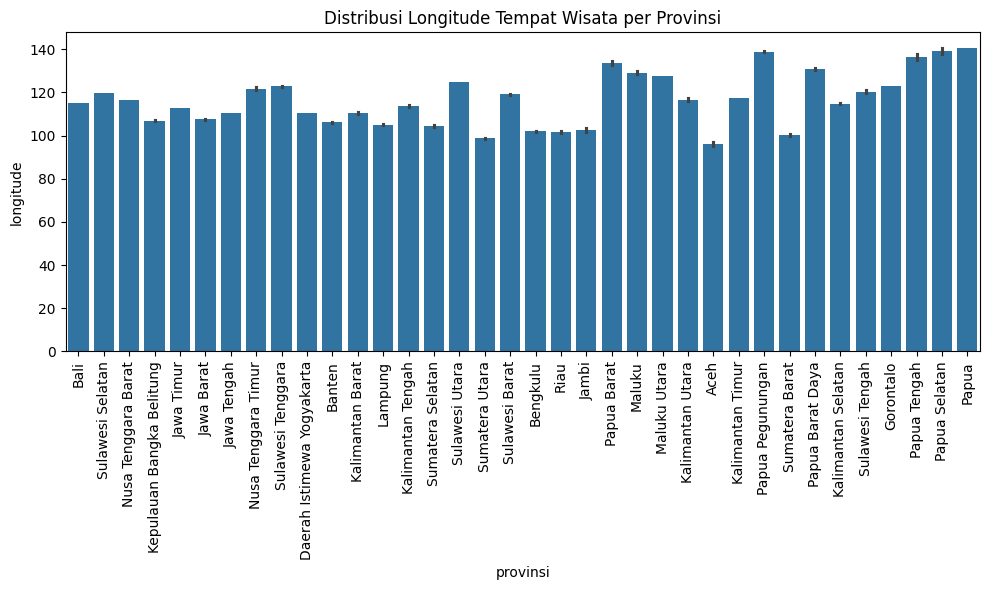

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='provinsi', y='longitude')
plt.xticks(rotation=90)
plt.title('Distribusi Longitude Tempat Wisata per Provinsi')
plt.tight_layout()
plt.show()

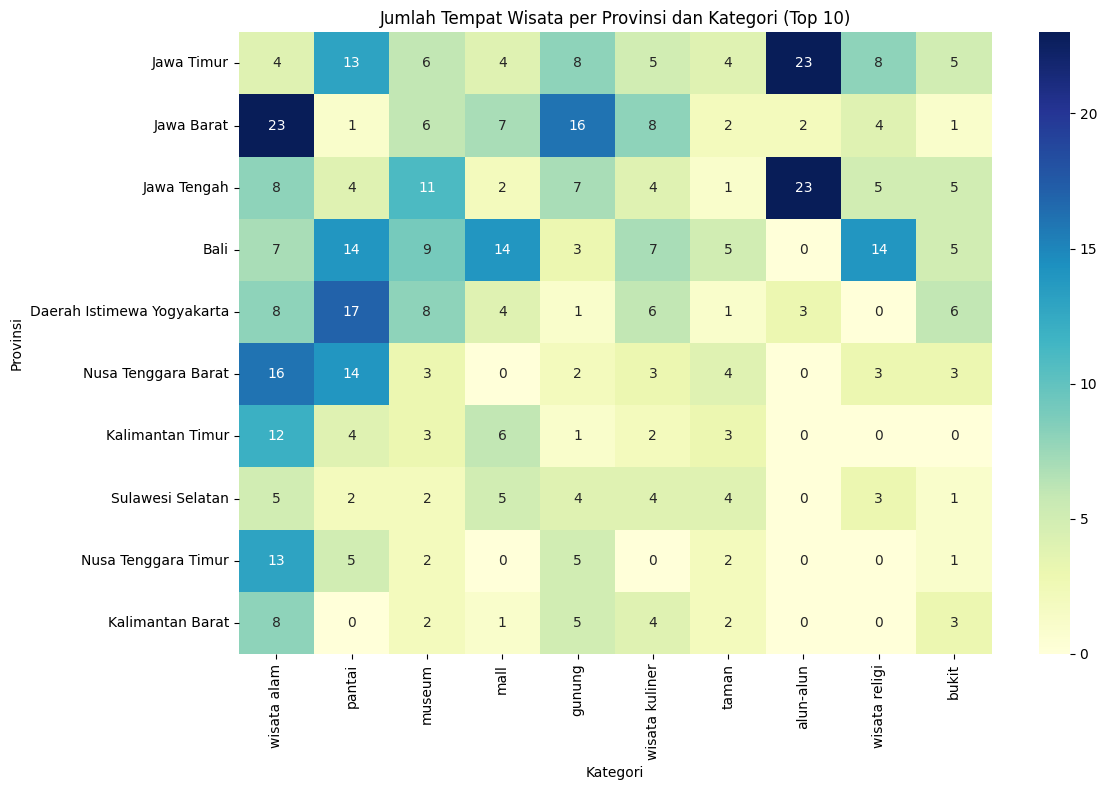

In [ ]:
pivot_table = pd.crosstab(df['provinsi'], df['kategori'])
top_kat = df['kategori'].value_counts().nlargest(10).index
top_prov = df['provinsi'].value_counts().nlargest(10).index
pivot_filtered = pivot_table.loc[top_prov, top_kat]
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_filtered, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Jumlah Tempat Wisata per Provinsi dan Kategori (Top 10)')
plt.xlabel("Kategori")
plt.ylabel("Provinsi")
plt.tight_layout()
plt.show()

## **Eda univariate**

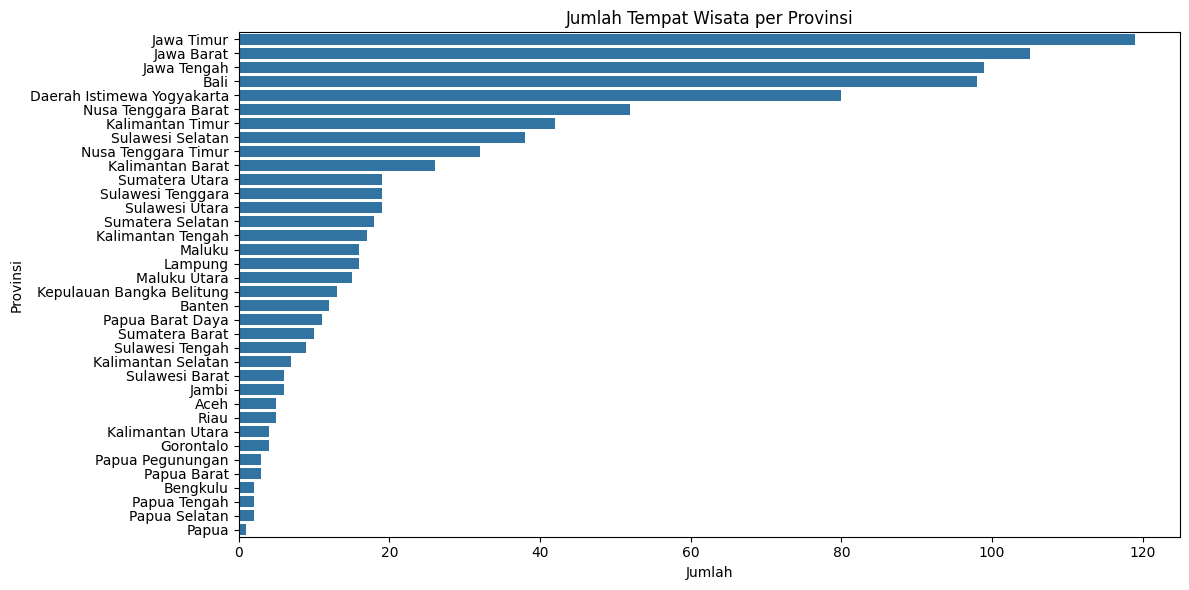

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='provinsi', order=df['provinsi'].value_counts().index)
plt.title('Jumlah Tempat Wisata per Provinsi')
plt.xlabel('Jumlah')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

In [ ]:
df['kota_kabupaten'] = df['kota_kabupaten'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', str(x)))

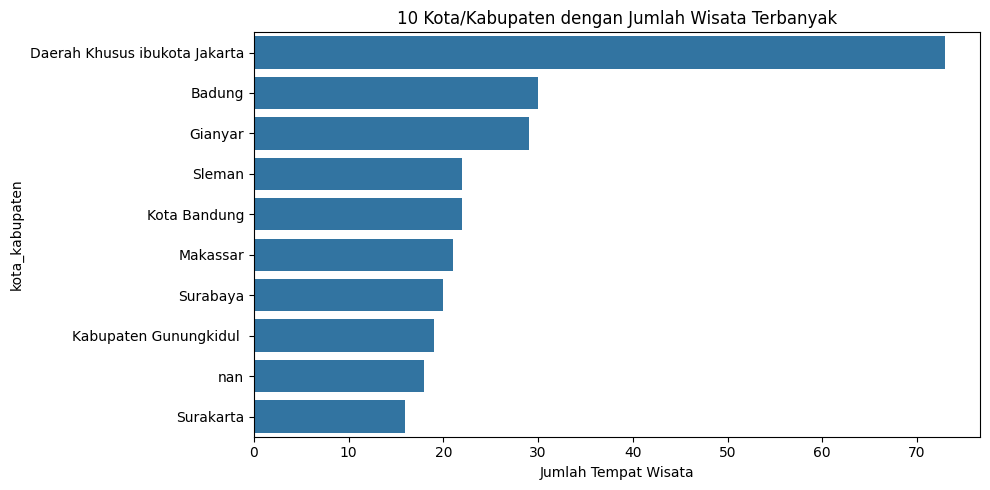

In [ ]:
plt.figure(figsize=(10, 5))
top_kota = df['kota_kabupaten'].value_counts().head(10)
sns.barplot(x=top_kota.values, y=top_kota.index)
plt.title('10 Kota/Kabupaten dengan Jumlah Wisata Terbanyak')
plt.xlabel('Jumlah Tempat Wisata')
plt.tight_layout()
plt.show()

# **Data Preprocessing**

In [ ]:
print(df.isnull().sum())

kategori           0
nama_wisata        0
latitude           0
longitude          0
alamat             0
provinsi          90
kota_kabupaten     0
nama_lengkap       0
deskripsi          0
path               0
path_gambar        0
dtype: int64


In [ ]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
kategori          0
nama_wisata       0
latitude          0
longitude         0
alamat            0
provinsi          0
kota_kabupaten    0
nama_lengkap      0
deskripsi         0
path              0
path_gambar       0
dtype: int64


<ipython-input-206-397b8c13651b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df[df.duplicated('nama_wisata', keep=False)]

,kategori,nama_wisata,latitude,longitude,alamat,provinsi,kota_kabupaten,nama_lengkap,deskripsi,path,path_gambar


In [ ]:
def hapus_karakter_rusak(teks):
    return re.sub(r'[^\x00-\x7F]+', ' ', str(teks))

In [ ]:
def bersihkan_deskripsi(teks):
    teks = hapus_karakter_rusak(teks)
    teks = re.sub(r"==\s*[^=]+?\s*==.*", "", teks, flags=re.IGNORECASE | re.DOTALL)
    teks = re.sub(r"^Berikut(?: ini)?(?: adalah)?(?: daftar)?[^.]*\.", "", teks, flags=re.IGNORECASE)
    teks = re.sub(r"^(Latar belakang|Sejarah singkat)[^.]*\.", "", teks, flags=re.IGNORECASE)
    teks = hapus_karakter_rusak(teks)
    return teks.strip()

In [ ]:
df['provinsi'] = df['provinsi'].str.strip()
df['deskripsi_bersih'] = df['deskripsi'].apply(bersihkan_deskripsi)
df = df.drop(columns=['path', 'deskripsi'])

In [ ]:
# Buat mapping typo ke kategori benar
kategori_mapping = {
    'wisate alam': 'wisata alam',
    'wisath alam': 'wisata alam',
    'wisatr alam': 'wisata alam',
    'wisaub alam': 'wisata alam',
    'wisawa alam': 'wisata alam',
    'wisawi alam': 'wisata alam',
}

# Ganti nilai berdasarkan mapping
df['kategori'] = df['kategori'].replace(kategori_mapping)


In [ ]:
df_clean = df.copy()
df_clean

,kategori,nama_wisata,latitude,longitude,alamat,provinsi,kota_kabupaten,nama_lengkap,path_gambar,deskripsi_bersih
0,air terjun,Air Terjun Aling-Aling,-8.176792,115.106284,"Air Terjun Aling-Aling, Panji Anom, Buleleng, ...",Bali,Buleleng,"Air Terjun Aling-Aling, Buleleng, Bali",gambar_wisata/Air_Terjun_Aling-Aling,Deskripsi tidak ditemukan
1,air terjun,Air Terjun Bantimurung,-5.016520,119.685520,"Air Terjun Bantimurung, Jalan Poros Bantimurun...",Sulawesi Selatan,Sulawesi,"Air Terjun Bantimurung, Sulawesi, Sulawesi Sel...",gambar_wisata/Air_Terjun_Bantimurung,Air Terjun Bantimurung adalah salah satu air t...
2,air terjun,Air Terjun Benang Kelambu,-8.532770,116.337011,"Air Terjun Benang Kelambu, Pemotoh, Lombok Ten...",Nusa Tenggara Barat,Lombok Tengah,"Air Terjun Benang Kelambu, Lombok Tengah, Nusa...",gambar_wisata/Air_Terjun_Benang_Kelambu,Deskripsi tidak ditemukan
3,air terjun,Air Terjun Benang Stokel,-8.533036,116.341379,"Air Terjun Benang Stokel, Pemotoh, Lombok Teng...",Nusa Tenggara Barat,Lombok Tengah,"Air Terjun Benang Stokel, Lombok Tengah, Nusa ...",gambar_wisata/Air_Terjun_Benang_Stokel,Deskripsi tidak ditemukan
4,air terjun,Air Terjun Bidadari,-2.928361,107.839043,"Air Terjun Bidadari, Nyuruk, Belitung Timur, K...",Kepulauan Bangka Belitung,Belitung Timur,"Air Terjun Bidadari, Belitung Timur, Kepulauan...",gambar_wisata/Air_Terjun_Bidadari,Daftar ini tidak lengkap dan hanya dapat dijad...
...,...,...,...,...,...,...,...,...,...,...
1020,wisata alam,Situ Cileunca,-7.202004,107.547142,"Situ Cileunca, Kampung Cibuluh, Pulosari, Kabu...",Jawa Barat,Kabupaten Bandung,"Situ Cileunca, Kabupaten Bandung, Jawa Barat",gambar_wisata/Situ_Cileunca,"Situ Cileunca (Aksara Sunda Baku: ), adala..."
1021,wisata alam,Situ Cisanti,-7.209391,107.657477,"Situ Cisanti, Kertasari, Kabupaten Bandung, Ja...",Jawa Barat,Kabupaten Bandung,"Situ Cisanti, Kabupaten Bandung, Jawa Barat",gambar_wisata/Situ_Cisanti,Situ Cisanti (Aksara Sunda Baku: ) adalah d...
1022,wisata alam,Situ Patenggang,-7.165260,107.369782,"Situ Patenggang, Bauan, Rancabali, Kabupaten B...",Jawa Barat,Kabupaten Bandung,"Situ Patenggang, Kabupaten Bandung, Jawa Barat",gambar_wisata/Situ_Patenggang,Situ Patenggang atau Situ Patengan adalah suat...
1023,wisata alam,Situ Rawa Gede,-6.292928,106.977288,"Situ Rawa Gede, Pesona Metropolitan, Bojong Me...",Jawa Barat,Bekasi,"Situ Rawa Gede, Bekasi, Jawa Barat",gambar_wisata/Situ_Rawa_Gede,Kabupaten Purwakarta (bahasa Sunda: ) adalah ...


In [ ]:
csv_string = df_clean.to_csv(index=False)
from google.colab import files
with open('wisata_indonesia_final.csv', 'w') as f:
  f.write(csv_string)

files.download('wisata_indonesia_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
preferred_categories = ["gunung", "taman", "pantai"]
user_provinsi = "Jawa Timur"

filtered_df = df_clean[df_clean['provinsi'].str.lower() == user_provinsi.lower()].copy()
filtered_df['label'] = filtered_df['kategori'].apply(lambda x: 1 if x in preferred_categories else 0)


print("Data setelah filter:", filtered_df.shape)

Data setelah filter: (209, 11)


# **Modelling: Skor Cosine Similarity**

In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwords_indonesia)
tfidf_matrix = tfidf.fit_transform(filtered_df['deskripsi_bersih'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
user_pref_kategori = " ".join(preferred_categories)
user_vector = tfidf.transform([user_pref_kategori])
cosine_sim = cosine_similarity(user_vector, tfidf_matrix).flatten()

In [ ]:
filtered_df['score'] = cosine_sim

# **Feature Engineering**

In [ ]:
filtered_df['desc_len'] = filtered_df['deskripsi_bersih'].apply(lambda x: len(str(x).split()))

In [ ]:
le_kategori = LabelEncoder()
le_provinsi = LabelEncoder()

In [ ]:
filtered_df['desc_len'] = filtered_df['deskripsi_bersih'].apply(lambda x: len(str(x).split()))
filtered_df['kategori_enc'] = le_kategori.fit_transform(filtered_df['kategori'])
filtered_df['provinsi_enc'] = le_provinsi.fit_transform(filtered_df['provinsi'])
filtered_df['is_preferred_category'] = filtered_df['kategori'].apply(lambda x: 1 if x in preferred_categories else 0)

In [ ]:
X = filtered_df[['kategori_enc', 'provinsi_enc', 'desc_len', 'is_preferred_category']]
y = filtered_df['score']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
df_clean['kategori'].unique()

array(['air terjun', 'alun-alun', 'bukit', 'cafe view', 'candi', 'gunung',
       'kebun binatang', 'lembah', 'mall', 'monumen', 'museum', 'pantai',
       'rumah adat', 'taman', 'wahana keluarga', 'wisata  religi',
       'wisata alam', 'wisata edukasi', 'wisata kerajaan',
       'wisata kuliner', 'wisata lampion', 'wisata religi',
       'wisata tematik'], dtype=object)

# **Modelling dengan TensorFlow**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(batch_shape=(4, 4)),  # <-- batch size = 4, fitur = 4
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.2171 - mae: 0.4554 - val_loss: 0.1970 - val_mae: 0.4320
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1862 - mae: 0.4224 - val_loss: 0.1611 - val_mae: 0.3887
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1521 - mae: 0.3765 - val_loss: 0.1255 - val_mae: 0.3419
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1167 - mae: 0.3212 - val_loss: 0.0911 - val_mae: 0.2885
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0862 - mae: 0.2757 - val_loss: 0.0605 - val_mae: 0.2322
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0620 - mae: 0.2372 - val_loss: 0.0383 - val_mae: 0.1843
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0391 - mae: 0.1847 - val_loss: 0.0253 - val_mae: 0.1473
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0255 - mae: 0.1473 - val_loss: 0.0185 - val_mae: 0.1224
Epoch 9/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mae: 0.1149 - 

# **Evaluasi Model**

In [ ]:
# Ambil ground truth dan hasil rekomendasi
filtered_df['label'] = filtered_df['kategori'].apply(lambda x: 1 if x in preferred_categories else 0)

# Urutkan berdasarkan skor cosine similarity
filtered_df_sorted = filtered_df.sort_values(by='score', ascending=False)
top_k = 10
top_k_recommendations = filtered_df_sorted.head(top_k)
ground_truth = filtered_df[filtered_df['label'] == 1]['nama_wisata'].values
predicted = top_k_recommendations['nama_wisata'].values

def precision_recall_at_k(ground_truth, predicted, k):
    predicted_k = predicted[:k]
    relevant = set(ground_truth)
    retrieved = set(predicted_k)
    true_positive = relevant.intersection(retrieved)

    precision = len(true_positive) / k
    recall = len(true_positive) / len(relevant) if len(relevant) > 0 else 0.0

    return precision, recall

precision, recall = precision_recall_at_k(ground_truth, predicted, top_k)
print(f"Precision@{top_k}: {precision:.2f}")
print(f"Recall@{top_k}: {recall:.2f}")


Precision@10: 1.00
Recall@10: 0.28


In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f} | MAE: {mae:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0030 - mae: 0.0357
Loss: 0.0036 | MAE: 0.0378


# **Prediksi & Rekomendasi**

In [ ]:
filtered_df['predicted_score'] = model.predict(X_scaled).flatten()
top_rekomendasi = filtered_df.sort_values(by='predicted_score', ascending=False).head(10)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


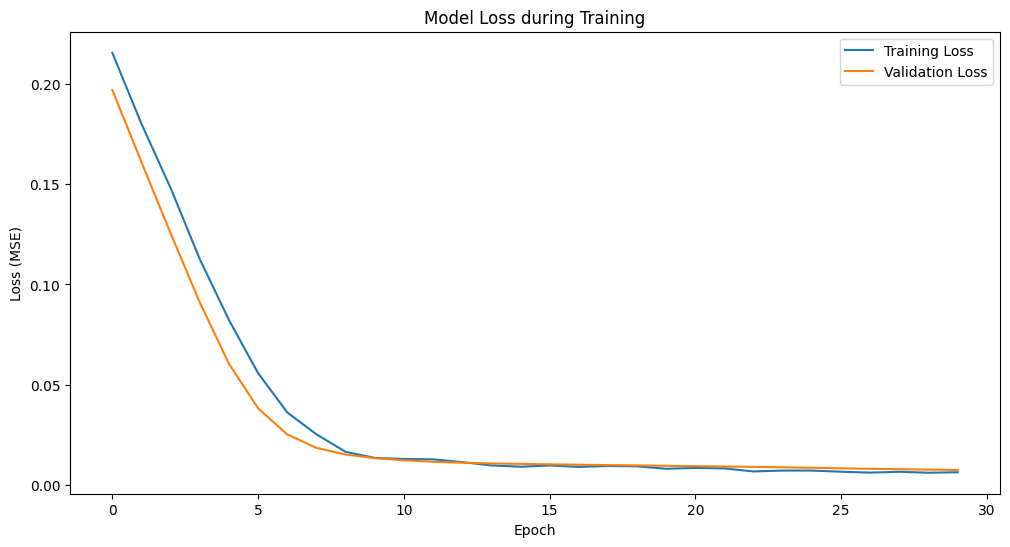

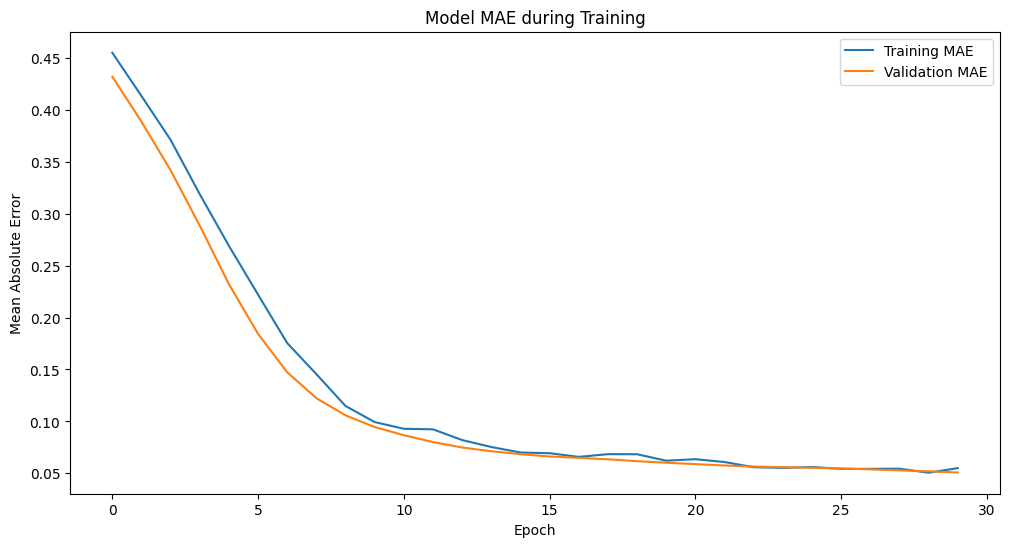

In [ ]:
import matplotlib.pyplot as plt
# Visualisasi hasil evaluasi model
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE during Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Rekomendasi dari Preferensi User

In [ ]:
def rekomendasi_wisata_berbobot(preferred_categories, user_provinsi, df, model, le_kategori, le_provinsi, scaler, weight_model=0.3, weight_tfidf=0.7):
    # Filter data sesuai provinsi
    filtered_df = df[df['provinsi'].str.lower() == user_provinsi.lower()].copy()
    if 'deskripsi_bersih' not in filtered_df.columns:
        filtered_df['deskripsi_bersih'] = filtered_df['deskripsi'].apply(bersihkan_deskripsi)

    # Hitung TF-IDF cosine similarity
    tfidf = TfidfVectorizer(stop_words=stopwords_indonesia)
    tfidf_matrix = tfidf.fit_transform(filtered_df['deskripsi_bersih'])
    user_pref_kategori = " ".join(preferred_categories)
    user_vector = tfidf.transform([user_pref_kategori])
    cosine_sim = cosine_similarity(user_vector, tfidf_matrix).flatten()
    filtered_df['cosine_score'] = cosine_sim

    # Feature engineering untuk model
    filtered_df['desc_len'] = filtered_df['deskripsi_bersih'].apply(lambda x: len(str(x).split()))
    filtered_df['kategori_enc'] = le_kategori.transform(filtered_df['kategori'])
    filtered_df['provinsi_enc'] = le_provinsi.transform(filtered_df['provinsi'])
    filtered_df['is_preferred_category'] = filtered_df['kategori'].apply(lambda x: 1 if x in preferred_categories else 0)

    X = filtered_df[['kategori_enc', 'provinsi_enc', 'desc_len', 'is_preferred_category']]
    X_scaled = scaler.transform(X)

    # Prediksi skor dengan model TensorFlow
    filtered_df['model_score'] = model.predict(X_scaled).flatten()
    filtered_df['final_score'] = weight_model * filtered_df['model_score'] + weight_tfidf * filtered_df['cosine_score']

    # Ambil top 10 rekomendasi berdasarkan final_score
    top_rekomendasi = filtered_df.sort_values(by='final_score', ascending=False).head(10)

    # Tampilkan kolom yang diminta plus skor
    return top_rekomendasi[['nama_wisata', 'provinsi', 'alamat', 'deskripsi_bersih', 'kota_kabupaten', 'final_score', 'cosine_score', 'model_score']]


In [ ]:
valid_categories = df_clean["kategori"].unique()

filtered_preferred_categories = [cat for cat in preferred_categories if cat in valid_categories]

if not filtered_preferred_categories:
    print("Maaf, tidak ada kategori yang cocok dengan preferensi Anda.")
else:
    hasil_rekomendasi = rekomendasi_wisata_berbobot(
        filtered_preferred_categories,
        user_provinsi,
        df_clean,
        model,
        le_kategori,
        le_provinsi,
        scaler
    )
    print(hasil_rekomendasi)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
                nama_wisata    provinsi  \
512        Pantai Rajegwesi  Jawa Timur   
574  Taman Nasional Baluran  Jawa Timur   
225           Gunung Semeru  Jawa Timur   
453             Pantai Boom  Jawa Timur   
169           Gunung Arjuno  Jawa Timur   
239         Gunung Welirang  Jawa Timur   
529       Pantai Tambakrejo  Jawa Timur   
509        Pantai Plengkung  Jawa Timur   
473           Pantai Klayar  Jawa Timur   
511            Pantai Popoh  Jawa Timur   

                                                alamat  \
512  Pantai Rajegwesi, Rajegwesi, Banyuwangi, Jawa ...   
574  Taman Nasional Baluran, Situbondo, Banyuwangi,...   
225  Gunung Semeru, Lumajang, Jawa Timur, Jawa, Ind...   
453  Pantai Boom, Krajan, Banyuwangi, Kampungmandar...   
169  Gunung Arjuno, Bumirejo, Kabupaten Malang, Jaw...   
239  Gunung Welirang, Pacet, Mojokerto, Jawa Timur,...   
529  Pantai Tambakrejo, Jalan Pantai, Tambakrejo, B...   
509  Pantai Plengkung, G

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
model.save("my_model.h5")


In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras my_model.h5 tfjs_model/

2025-05-26 09:37:40.262436: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748252260.287394    7448 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748252260.296447    7448 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r tfjs.zip tfjs_model/
files.download('tfjs.zip')

updating: tfjs_model/ (stored 0%)
updating: tfjs_model/group1-shard1of1.bin (deflated 8%)
updating: tfjs_model/model.json (deflated 79%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>